In [9]:
import pandas as pd
import altair as alt

In [11]:

df = pd.read_csv('events_with_lat_and_lon.csv')

In [12]:
df.head()

,Name,Date,Location,Type,Region,Latitude,Longitude
0,2024 KPMG Women’s PGA Championship,6/20/2024 through 6/23/2024,Sahalee Country Club,Sports,Bellevue / Eastside,47.634889,-122.057016
1,2024 University of Washington MFA + MDes Thesi...,5/24/2024 through 6/30/2024,Henry Art Gallery,Museums,University District,47.656525,-122.311733
2,6th Annual Sami Film Festival,2/9/2024 through 2/12/2024,Majestic Bay Theatres,Museums,Fremont / Ballard,NaN,NaN
3,75 Years of Porsche,Ongoing,LeMay - America's Car Museum,Museums,South,47.236211,-122.430444
4,A Case for the Existence of God,2/2/2024 through 2/18/2024,ACT Theatre,Theatre,Downtown,47.610850,-122.332326


In [13]:
df.iloc[0].to_dict()

{'Name': '2024 KPMG Women’s PGA Championship',
 'Date': '6/20/2024 through 6/23/2024',
 'Location': 'Sahalee Country Club',
 'Type': 'Sports',
 'Region': 'Bellevue / Eastside',
 'Latitude': 47.6348885,
 'Longitude': -122.05701598333332}

In [14]:
df.shape

(960, 7)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       960 non-null    object 
 1   Date       960 non-null    object 
 2   Location   960 non-null    object 
 3   Type       960 non-null    object 
 4   Region     960 non-null    object 
 5   Latitude   920 non-null    float64
 6   Longitude  920 non-null    float64
dtypes: float64(2), object(5)
memory usage: 52.6+ KB


Let's check if we have missing data in our dataset.

In [16]:
df.isnull().sum()

Name          0
Date          0
Location      0
Type          0
Region        0
Latitude     40
Longitude    40
dtype: int64

In [19]:
df.value_counts('Name')

Name
2024 KPMG Women’s PGA Championship                            40
2024 University of Washington MFA + MDes Thesis Exhibition    40
Apollo                                                        40
Antonio M. Gomez: LINEAJES                                    40
Antarctic Symphony                                            40
Annie Eastwood with Kimball and the Fugitives                 40
Anida Yoeu Ali: Hybrid Skin, Mythical Presence                40
Anand Gopal                                                   40
An Evening with Tina Campt: Black Feminist Visual Culture     40
An Evening with Jinjoo Cho                                    40
American Flats Album Release                                  40
American Art: The Stories We Carry                            40
Amazing Life                                                  40
All Will Suffer                                               40
Alice in Shadowland                                           40
Al Young’s 1970 Dodg

Seems like there is dirty data in the sex column. Let's clean it up.

In [21]:
df[df['Name'] == '.']

,Name,Date,Location,Type,Region,Latitude,Longitude


In [22]:
df.loc[336, 'Type'] = "Sports"

In [23]:
df.loc[336]

Name         2024 KPMG Women’s PGA Championship
Date                6/20/2024 through 6/23/2024
Location                   Sahalee Country Club
Type                                     Sports
Region                      Bellevue / Eastside
Latitude                              47.634889
Longitude                           -122.057016
Name: 336, dtype: object

In [25]:
df.value_counts('Type')

Type
Museums                400
Music                  320
Theatre                120
Readings & Lectures     80
Sports                  40
Name: count, dtype: int64

<Axes: ylabel='count'>

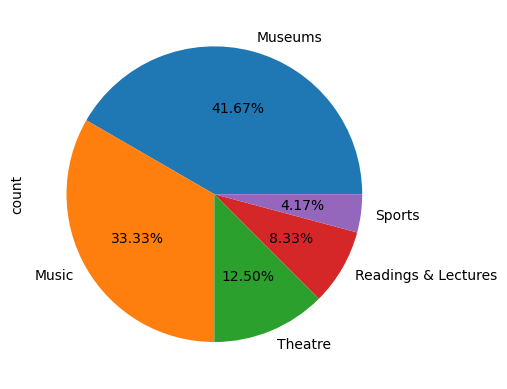

In [30]:
df.value_counts('Type').plot(kind='pie',autopct="%.2f%%")

In [37]:
alt.Chart(df).mark_bar(color = 'black').encode(
    x='Region_length_mm',
    y='Type_depth_mm',
)

ValueError: Unable to determine data type for the field "Region_length_mm"; verify that the field name is not misspelled. If you are referencing a field from a transform, also confirm that the data type is specified correctly.

alt.Chart(...)

In [40]:
(
    alt
    .Chart(df)
    .mark_bar()
    .encode(
        x='count()',
        y=alt.Y('Location', sort='-x'),
        color='Location'
    )
    .properties(
        width=600,
        height=400
    )
    .interactive()
)

alt.Chart(...)

In [57]:
# alt.Chart(df).mark_point().encode(
#     x='Name_length_mm',
#     y='Date_depth_mm',
#     color='species'
# ).interactive()

import pandas as pd
import altair as alt

# Load the CSV file into a DataFrame
df = pd.read_csv('events_with_lat_and_lon.csv')

# Extract year and month from the start date
df['YearMonth'] = pd.to_datetime(df['Date'].str.split(' through ').str[0], errors='coerce').dt.to_period('M')

# Count the number of events per year-month and reset index to use in Altair
events_per_year_month = df.groupby('YearMonth', as_index=False).size().rename(columns={'size': 'Number of Events'})

# Convert YearMonth to string for better display and sorting
events_per_year_month['YearMonth'] = events_per_year_month['YearMonth'].astype(str)

# Generate and display the Altair chart with specified width
chart = alt.Chart(events_per_year_month).mark_point().encode(
    x=alt.X('YearMonth:O', axis=alt.Axis(labelAngle=-45), title='Year and Month'),  # Adjust label angle for readability
    y=alt.Y('Number of Events:Q', title='Number of Events'),  # Quantitative scale
    tooltip=['YearMonth', 'Number of Events']
).properties(
    width=800  # Adjust the width as needed
).interactive()

chart



alt.Chart(...)